# DS-SF-25 | Codealong and Lab 13 | Natural Language Processing and Text Classification

# Codealong - Text Processing with `sklearn`

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import feature_extraction, ensemble, cross_validation, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

The data is about sentiments on Amazon reviews.

In [2]:
reviews = []
sentiments = []

with open(os.path.join('..', 'datasets', 'amazon-reviews.txt')) as file:
    for line in file.readlines():
        line = line.strip('\n')
        review, sentiment = line.split('\t')
        sentiment = np.nan if sentiment == '' else int(sentiment)

        reviews.append(review)
        sentiments.append(sentiment)

df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

In [3]:
df

,review,sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN
...,...,...
14999,"The screen on my phone said ""Not Charging"".",NaN
15000,This is my 4th Samsung cell phone with T-Mobile.,NaN
15001,great company.,NaN
15002,"The ""call"" and ""hang-up"" keys are now properly...",NaN


In [5]:
df.dropna(inplace = True) # Let's drop NaNs

In [6]:
df

,review,sentiment
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0
...,...,...
2925,The screen does get smudged easily because it ...,0.0
2930,What a piece of junk.. I lose more calls on th...,0.0
2934,Item Does Not Match Picture.,0.0
2935,The only thing that disappoint me is the infra...,0.0


In [8]:
X=df.review
y=df.sentiment

In [9]:
X

1       So there is no way for me to plug it in here i...
2                             Good case, Excellent value.
5                                  Great for the jawbone.
10      Tied to charger for conversations lasting more...
11                                      The mic is great.
                              ...                        
2925    The screen does get smudged easily because it ...
2930    What a piece of junk.. I lose more calls on th...
2934                         Item Does Not Match Picture.
2935    The only thing that disappoint me is the infra...
2937    You can not answer calls with the unit, never ...
Name: review, dtype: object

In [10]:
y

1       0.0
2       1.0
5       1.0
10      0.0
11      1.0
       ... 
2925    0.0
2930    0.0
2934    0.0
2935    0.0
2937    0.0
Name: sentiment, dtype: float64

## Train/test sets

In [11]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [12]:
train_X

2002    A must study for anyone interested in the "wor...
277     I purcashed this for the car charger and it do...
1991    I'm happy about this purchase- good quality an...
1215                               Soyo technology sucks.
1933                      Very Dissapointing Performance.
                              ...                        
2417    The calls drop, the phone comes on and off at ...
597     Lately they have been extremely nice and helpf...
1937    I recommend iGo to anyone with different brand...
1727                 None of it works, just don't buy it.
2023                           Chinese Forgeries Abound!.
Name: review, dtype: object

## `CountVectorizer`

`CountVectorizer` converts a collection of text into a matrix of features.  Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

Vectorizers are like other models in `sklearn`:
- We create a vectorizer object with the parameters of our feature space
- We fit a vectorizer to learn the vocabulary
- We transform a set of text into that feature space

(And check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html as needed)

In [16]:
vectorizer=feature_extraction.text.CountVectorizer(stop_words='english')

In [17]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Note: Stopwords are non-content words.  (e.g. 'to', 'the', and 'it'); they aren’t helpful for prediction, so we remove them.

In [18]:
vectorizer.fit(train_X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

The bag-of-words:

We now use `tranform` to generate the sample X word matrix; one column per feature (here, a word)

In [21]:
train_X=vectorizer.transform(train_X)

In [29]:
test_X=vectorizer.transform(test_X)

In [22]:
train_X

<600x1210 sparse matrix of type '<type 'numpy.int64'>'
	with 2880 stored elements in Compressed Sparse Row format>

While dense matrices store every entry in the matrix, sparse matrices only store the nonzero entries.  Sparse matrices don't have a lot of extra features, and some algorithms may not work for them so you use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily.  You can convert from sparse matrices to dense matrices with `.todense()`

In [23]:
train_X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [30]:
test_X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

## Random Forest

We can now build a random forest model to predict "sentiment".

In [24]:
model = ensemble.RandomForestClassifier(n_estimators = 5)

cross_validation.cross_val_score(model, train_X, train_y, scoring = 'roc_auc')

array([ 0.81345354,  0.78486395,  0.82100263])

In [25]:
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
model.score(train_X, train_y)

0.95666666666666667

In [27]:
def roc_auc(model, train_X, train_y, title):
    train_y_hat = model.predict(train_X)

    fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_hat)

    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([.0, 1.])
    plt.ylim([.0, 1.1])
    plt.xlabel('FPR/Fall-out')
    plt.ylabel('TPR/Sensitivity')
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

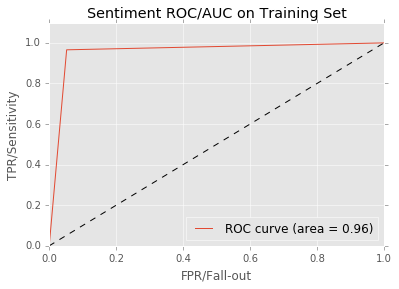

In [28]:
roc_auc(model, train_X, train_y, 'Sentiment ROC/AUC on Training Set')

In [31]:
model.score(test_X, test_y)

0.77000000000000002

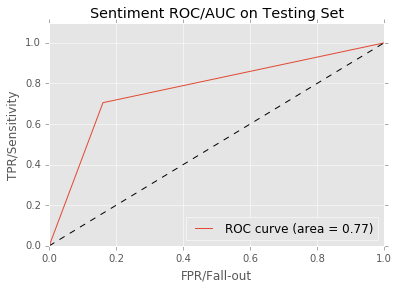

In [32]:
roc_auc(model, test_X, test_y, 'Sentiment ROC/AUC on Testing Set')

# Lab - TF-IDF

Directions: Redo the analysis above with `TfidfVectorizer` instead of `CountVectorizer`.  What do you get?

(Check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html as needed)

In [ ]:
# TODO